# Machine Learning and Content Analytcis

## Twitter US Airline Sentiment

### Vasiliki Malliopoulou p2821911
### Isidora Panagopoulou p2821915
### Chrysoula Zacharopoulou p2821903

In [1]:
import re
import os
import warnings

warnings.filterwarnings("ignore")

from collections import defaultdict
from glob import glob

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize, wordpunct_tokenize

from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from tqdm import tqdm

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

Using TensorFlow backend.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
tweetsreview = pd.read_csv('Tweets.csv')

In [3]:
tweetsreview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [4]:
tweets = tweetsreview.filter(['tweet_id', 'airline_sentiment', 'text', 'airline'])

In [5]:
tweets.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

## Performing  EDA Analysis

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

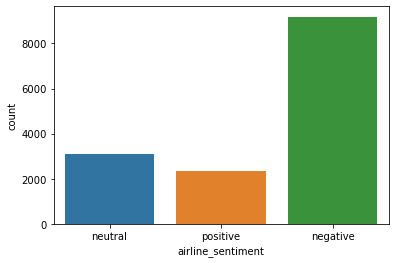

In [6]:
sns.countplot(x="airline_sentiment", data=tweets)

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

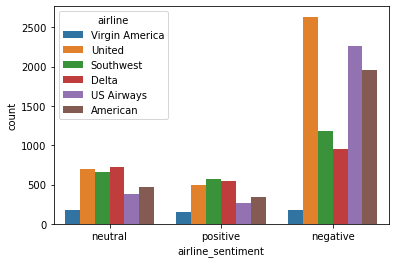

In [7]:
sns.countplot(x='airline_sentiment', hue='airline', data = tweets)

In [8]:
tweets['length'] = tweets['text'].str.split(" ").str.len()

<AxesSubplot:xlabel='airline_sentiment', ylabel='length'>

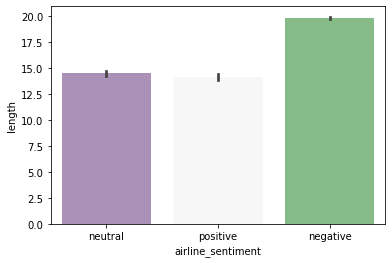

In [9]:
sns.barplot('airline_sentiment', 'length', data=tweets, palette='PRGn')

In [58]:
tweets.head(5)

tweet_id airline_sentiment  \
0  570306133677760513           neutral   
1  570301130888122368          positive   
2  570301083672813571           neutral   
3  570301031407624196          negative   
4  570300817074462722          negative   

                                                text         airline  length  
0                @VirginAmerica What @dhepburn said.  Virgin America       4  
1  @VirginAmerica plus you've added commercials t...  Virgin America       9  
2  @VirginAmerica I didn't today... Must mean I n...  Virgin America      12  
3  @VirginAmerica it's really aggressive to blast...  Virgin America      17  
4  @VirginAmerica and it's a really big bad thing...  Virgin America      10

## Text pre-processing -- A text pre processing includes the following steps


In [10]:
tweets['text'] = tweets['text'].str.lower()

In [60]:
tweets

tweet_id airline_sentiment  \
0      570306133677760513           neutral   
1      570301130888122368          positive   
2      570301083672813571           neutral   
3      570301031407624196          negative   
4      570300817074462722          negative   
...                   ...               ...   
14635  569587686496825344          positive   
14636  569587371693355008          negative   
14637  569587242672398336           neutral   
14638  569587188687634433          negative   
14639  569587140490866689           neutral   

                                                    text         airline  \
0                    @virginamerica what @dhepburn said.  Virgin America   
1      @virginamerica plus you've added commercials t...  Virgin America   
2      @virginamerica i didn't today... must mean i n...  Virgin America   
3      @virginamerica it's really aggressive to blast...  Virgin America   
4      @virginamerica and it's a really big bad thing...  Virgin America   
...                                                  ...             ...   
14635  @americanair thank you we got on a different f...        American   
14636  @americanair leaving over 20 minutes late flig...        American   
14637  @americanair please bring american airlines to...        American   
14638  @americanair you have my money, you change my ...        American   
14639  @americanair we have 8 ppl so we need 2 know h...        American   

       length  
0           4  
1           9  
2          12  
3          17  
4          10  
...       ...  
14635      11  
14636      23  
14637       7  
14638      23  
14639      30  

[14640 rows x 5 columns]

In [11]:
en_stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [12]:
# remove urls, stopwords and keep only alphanumeric

def clean_data(text):
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text)])
    text = re.sub(r'[^a-zA-Z0-9\s]+', '', text)
    text = re.sub(r'\s+', ' ', text).strip().lower()
    text = ' '.join(word for word in text.strip().lower().split(' ') if word not in en_stopwords)
    return text

In [13]:
tweets['cleaned_tweetText'] = tweets.text.apply(clean_data)

In [64]:
tweets

tweet_id airline_sentiment  \
0      570306133677760513           neutral   
1      570301130888122368          positive   
2      570301083672813571           neutral   
3      570301031407624196          negative   
4      570300817074462722          negative   
...                   ...               ...   
14635  569587686496825344          positive   
14636  569587371693355008          negative   
14637  569587242672398336           neutral   
14638  569587188687634433          negative   
14639  569587140490866689           neutral   

                                                    text         airline  \
0                    @virginamerica what @dhepburn said.  Virgin America   
1      @virginamerica plus you've added commercials t...  Virgin America   
2      @virginamerica i didn't today... must mean i n...  Virgin America   
3      @virginamerica it's really aggressive to blast...  Virgin America   
4      @virginamerica and it's a really big bad thing...  Virgin America   
...                                                  ...             ...   
14635  @americanair thank you we got on a different f...        American   
14636  @americanair leaving over 20 minutes late flig...        American   
14637  @americanair please bring american airlines to...        American   
14638  @americanair you have my money, you change my ...        American   
14639  @americanair we have 8 ppl so we need 2 know h...        American   

       length                                  cleaned_tweetText  
0           4                        virginamerica dhepburn said  
1           9  virginamerica plus added commercial experience...  
2          12  virginamerica nt today must mean need take ano...  
3          17  virginamerica really aggressive blast obnoxiou...  
4          10                 virginamerica really big bad thing  
...       ...                                                ...  
14635      11     americanair thank got different flight chicago  
14636      23  americanair leaving 20 minute late flight warn...  
14637       7  americanair please bring american airline blac...  
14638      23  americanair money change flight nt answer phon...  
14639      30  americanair 8 ppl need 2 know many seat next f...  

[14640 rows x 6 columns]

In [14]:
tweets = tweets.filter(['airline_sentiment','cleaned_tweetText'])

In [66]:
emoji_count = defaultdict(int)
for i in tweets['cleaned_tweetText']:
    for emoji in re.findall(u'[\U0001f300-\U0001f650]|[\u2000-\u3000]', i):
        emoji_count[emoji] += 1

print (emoji_count)

defaultdict(<class 'int'>, {})


## Split the test in train and dataset

In [15]:
tweets.shape

(14640, 2)

In [16]:
tweets['airline_sentiment'] = tweets.airline_sentiment.apply({"negative": 0, "neutral": 1, "positive": 2}.get)

In [17]:
xtrain, xtest, ytrain, ytest =  train_test_split(tweets.cleaned_tweetText,
                                                 tweets.airline_sentiment,
                                                 test_size=0.2, random_state=1001)

In [18]:
xtrain, xval, ytrain, yval =  train_test_split(xtrain, ytrain, test_size=0.1, random_state=1001)

In [19]:
xtrain

1762                   united fly southwestair never issue
6597     southwestair another great flight amp crew la ...
13474    americanair derekc21 leave jaipur tomorrow bac...
1520     united nt realize bag content wet got hotel se...
649      united wonder sharing fb insta would produce n...
                               ...                        
11209    usairways hold captain wa late flight bag doe ...
11671    usairways cant get reservation take look 2 hou...
12354    americanair dumas2ttg good morning tamara try ...
13327    americanair ca nt one ca nt get hold ca nt get...
1071               united look beauty dc 10 united airline
Name: cleaned_tweetText, Length: 10540, dtype: object

In [20]:
ytrain.unique()

array([2, 0, 1], dtype=int64)

In [21]:
word_freqs = nltk.FreqDist(xtrain.str.split(" ").sum())

In [22]:
#detecting the words that appear only once
len(word_freqs.hapaxes())

6662

In [23]:
#removal of these words
for word in word_freqs.hapaxes():
    word_freqs.pop(word)

In [24]:
len(word_freqs)

4856

In [25]:
#we replace the removed words with unknown and earn one more word
xtrain = xtrain.apply(lambda x: " ".join([w if w in word_freqs else '<unk>' for w in x.split(" ")]))

In [26]:
xtrain

1762                   united fly southwestair never issue
6597     southwestair another great flight amp crew la ...
13474    americanair derekc21 leave <unk> tomorrow back...
1520     united nt realize bag content wet got hotel se...
649      united wonder sharing fb <unk> would <unk> num...
                               ...                        
11209    usairways hold captain wa late flight bag doe ...
11671    usairways cant get reservation take look 2 hou...
12354    americanair <unk> good morning tamara try get ...
13327    americanair ca nt one ca nt get hold ca nt get...
1071               united look beauty dc 10 united airline
Name: cleaned_tweetText, Length: 10540, dtype: object

In [27]:
word_freqs = nltk.FreqDist(xtrain.str.split(" ").sum())

In [28]:
len(word_freqs)

4857

In [29]:
#we apply the function to validation and test set
xval = xval.apply(lambda x: " ".join([w if w in word_freqs else '<unk>' for w in x.split(" ")]))
xtest = xtest.apply(lambda x: " ".join([w if w in word_freqs else '<unk>' for w in x.split(" ")]))

In [30]:
xval

12644    americanair booked u airway site nt see cancel...
12029    americanair 800 number even let wait next cust...
2372     united luckily <unk> <unk> job welcome badservice
7954     jetblue thanks loose em airport 1st time found...
11593    usairways sister wa supposed leave 10 go back ...
                               ...                        
12084    americanair hi please ticket award ticket stat...
3124     united well yet checked bag ha already <unk> n...
7265     jetblue sorry <unk> meant ground traffic tryin...
1307     united three delayed flight missed connection ...
4578     southwestair eye next step <unk> inflight wifi...
Name: cleaned_tweetText, Length: 1172, dtype: object

In [31]:
xtest

5873     southwestair amp <unk> best friend imaginedrag...
11560    usairways u guy get much many customer fucking...
4680     southwestair checkin lame business really last...
8781     jetblue guy really bad jetblue fail someone be...
10822    usairways worst customer service ticket wa 180...
                               ...                        
1421     united even legal guy advertise flight cant honor
4602     southwestair fun delay nashville la vega crew ...
1937     united 6 hour plus delay <unk> finally flight ...
2701     united <unk> rep told u hotel shuttle come lik...
8574     jetblue okay new screen <unk> amp real nice am...
Name: cleaned_tweetText, Length: 2928, dtype: object

In [32]:
dist_text_len = xtrain.str.split(" ").apply(len).value_counts(normalize=True).sort_index()

<AxesSubplot:>

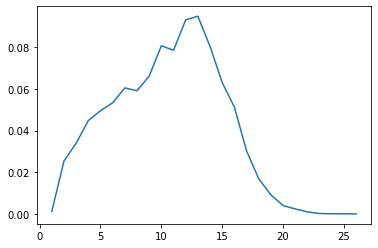

In [33]:
dist_text_len.plot()

In [34]:
# cumulative percent of text that contains 20 words
dist_text_len.iloc[:20].sum()

0.995920303605313

In [35]:
maxlen = 20

## Deep learning

In [36]:
tokenizer = Tokenizer(num_words=len(word_freqs))
tokenizer.fit_on_texts(xtrain)

xtrain= tokenizer.texts_to_sequences(xtrain)
xval = tokenizer.texts_to_sequences(xval)
xtest = tokenizer.texts_to_sequences(xtest)

In [37]:
xtrain = pad_sequences(xtrain, padding='post', maxlen=maxlen)
xval = pad_sequences(xval, padding='post', maxlen=maxlen)
xtest = pad_sequences(xtest, padding='post', maxlen=maxlen)

In [38]:
embedding_dim = 300
path = r"C:/Users/vicky/Desktop/machine learning"

In [39]:
embed_index = {}
fname = f'{path}/glove.6B.{embedding_dim}d.txt'
with open(fname, encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        embedding = np.asarray(values[1:], dtype='float32')
        embed_index[word] = embedding


In [40]:
len(embed_index)

400000

In [41]:
embed_index["<unk>"] = np.asarray(list(embed_index.values())).mean(0)

In [42]:
def create_embeddings_matrix(max_words, emb_index: dict,
                             tokenizer: Tokenizer,
                             emb_dim: int = 100) -> np.ndarray:
    """

    :param emb_index: Embeddings Index
    :param tokenizer: Keras fitted tokenizer.
    :param emb_dim: Embeddings dimension.
    :return: A matrix of shape (nb_words, emb_dim) containing the globe embeddings.
    """
    assert emb_dim in [50, 100, 200, 300]

    # Create a matrix of all embeddings
    # (stacking=concatenating all the vectors)
    all_embs = np.stack(emb_index.values())  # .values() gets the all the arrays from the keys

    # Calculate mean
    emb_mean = all_embs.mean()
    # Calculate standard deviation
    emb_std = all_embs.std()

    print("Embeddings AVG: {} | STD: {}".format(emb_mean, emb_std))

    # We can now create an embedding matrix holding all word vectors.

    word_index = tokenizer.word_index

    # How many words are there actually. Because we may have requested X most common tokens
    # and the total tokens are X/2
    nb_words = min(max_words, len(word_index))

    # Create a random matrix with the same mean and std as the embeddings

    embedding_matrix = np.random.normal(emb_mean,  # mean
                                        emb_std,  # std
                                        (nb_words, emb_dim)) # shape of the matrix

    # The vectors need to be in the same position as their index.
    # Meaning a word with token 1 needs to be in the second row (rows start with zero) and so on
    
    
    counter = 0
    # Loop over all words in the word index
    for word, i in word_index.items():  # .items() return a tuple with (word, word_index)

        # If we are above the amount of words we want to use we do nothing
        if i >= max_words:
            continue

        # Get the embedding vector for the word
        embedding_vector = emb_index.get(word)

        # If there is an embedding vector, put it in the embedding matrix
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            counter += 1
    
    print(f'Found {counter} pre-trained embeddings out of {nb_words}')
    
    return embedding_matrix

In [43]:
len(tokenizer.word_index)

4857

In [44]:
embed_index['the']

array([ 4.6560e-02,  2.1318e-01, -7.4364e-03, -4.5854e-01, -3.5639e-02,
        2.3643e-01, -2.8836e-01,  2.1521e-01, -1.3486e-01, -1.6413e+00,
       -2.6091e-01,  3.2434e-02,  5.6621e-02, -4.3296e-02, -2.1672e-02,
        2.2476e-01, -7.5129e-02, -6.7018e-02, -1.4247e-01,  3.8825e-02,
       -1.8951e-01,  2.9977e-01,  3.9305e-01,  1.7887e-01, -1.7343e-01,
       -2.1178e-01,  2.3617e-01, -6.3681e-02, -4.2318e-01, -1.1661e-01,
        9.3754e-02,  1.7296e-01, -3.3073e-01,  4.9112e-01, -6.8995e-01,
       -9.2462e-02,  2.4742e-01, -1.7991e-01,  9.7908e-02,  8.3118e-02,
        1.5299e-01, -2.7276e-01, -3.8934e-02,  5.4453e-01,  5.3737e-01,
        2.9105e-01, -7.3514e-03,  4.7880e-02, -4.0760e-01, -2.6759e-02,
        1.7919e-01,  1.0977e-02, -1.0963e-01, -2.6395e-01,  7.3990e-02,
        2.6236e-01, -1.5080e-01,  3.4623e-01,  2.5758e-01,  1.1971e-01,
       -3.7135e-02, -7.1593e-02,  4.3898e-01, -4.0764e-02,  1.6425e-02,
       -4.4640e-01,  1.7197e-01,  4.6246e-02,  5.8639e-02,  4.14

In [45]:
embedding_matrix = create_embeddings_matrix(emb_index=embed_index,
                                            tokenizer=tokenizer,
                                            emb_dim=embedding_dim,
                                            max_words=len(word_freqs) + 1)

Embeddings AVG: -0.003905011573806405 | STD: 0.3817698359489441
Found 4363 pre-trained embeddings out of 4857


one hot encoding for the ytrain

In [46]:
labeltrain = to_categorical(ytrain, num_classes=3)

In [47]:
labelval = to_categorical(yval, num_classes=3)

In [48]:
labeltest = to_categorical(ytest, num_classes=3)

In [49]:
# quick check to see if it enumerates from min to max
labeltrain[0][ytrain.iloc[0]], labelval[0][yval.iloc[0]], labeltest[0][ytest.iloc[0]]

(1.0, 1.0, 1.0)

## Models

### Feed Forward Network

In [50]:
from keras.layers import (Embedding, Flatten, Dense,
                          Dropout, Activation, LSTM,
                          Bidirectional, BatchNormalization,
                          Conv1D, GlobalMaxPooling1D, SpatialDropout1D,
                          MaxPooling1D)
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [51]:
model = Sequential()
embedding_layer = Embedding(len(word_freqs), embedding_dim, 
                            weights=[embedding_matrix], 
                            input_length=maxlen, trainable=False)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 300)           1457100   
_________________________________________________________________
flatten_1 (Flatten)          (None, 6000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               3072512   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [53]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
history = model.fit(xtrain, labeltrain,
                    epochs=50, batch_size=32,
                    validation_data=(xval, labelval),
                    callbacks=[EarlyStopping(patience=2)])


Train on 10540 samples, validate on 1172 samples
Epoch 1/50
10540/10540 [==============================] - 19s 2ms/step - loss: 0.7772 - accuracy: 0.6713 - val_loss: 0.7083 - val_accuracy: 0.6911
Epoch 2/50
10540/10540 [==============================] - 18s 2ms/step - loss: 0.6360 - accuracy: 0.7334 - val_loss: 0.6465 - val_accuracy: 0.7372
Epoch 3/50
10540/10540 [==============================] - 18s 2ms/step - loss: 0.5579 - accuracy: 0.7643 - val_loss: 0.6290 - val_accuracy: 0.7432
Epoch 4/50
10540/10540 [==============================] - 18s 2ms/step - loss: 0.4957 - accuracy: 0.7919 - val_loss: 0.6343 - val_accuracy: 0.7509
Epoch 5/50
10540/10540 [==============================] - 19s 2ms/step - loss: 0.4471 - accuracy: 0.8145 - val_loss: 0.6494 - val_accuracy: 0.7432


In [55]:
scorefeed = model.evaluate(xtest, labeltest, verbose=1)

2928/2928 [==============================] - 0s 152us/step


In [56]:
print("Test Score:", scorefeed[0])
print("Test Accuracy:", scorefeed[1])

Test Score: 0.648750726316796
Test Accuracy: 0.7469262480735779


In [57]:
model.save_weights("feed_forward.hdf5")

### Simple Neural Network

In [58]:
model = Sequential()
model = Sequential()
embedding_layer = Embedding(len(word_freqs), embedding_dim, 
                            weights=[embedding_matrix], 
                            input_length=maxlen, trainable=False)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [59]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 300)           1457100   
_________________________________________________________________
flatten_2 (Flatten)          (None, 6000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 18003     
Total params: 1,475,103
Trainable params: 18,003
Non-trainable params: 1,457,100
_________________________________________________________________
None


In [61]:
history = model.fit(xtrain, labeltrain,
                    epochs=50, batch_size=32,
                    validation_data=(xval, labelval),
                    callbacks=[EarlyStopping(patience=2)])

Train on 10540 samples, validate on 1172 samples
Epoch 1/50
10540/10540 [==============================] - 1s 108us/step - loss: 0.8089 - accuracy: 0.6592 - val_loss: 0.7743 - val_accuracy: 0.6715
Epoch 2/50
10540/10540 [==============================] - 1s 91us/step - loss: 0.7104 - accuracy: 0.7091 - val_loss: 0.7226 - val_accuracy: 0.6945
Epoch 3/50
10540/10540 [==============================] - 1s 91us/step - loss: 0.6597 - accuracy: 0.7314 - val_loss: 0.6951 - val_accuracy: 0.7022
Epoch 4/50
10540/10540 [==============================] - 1s 91us/step - loss: 0.6260 - accuracy: 0.7447 - val_loss: 0.6689 - val_accuracy: 0.7235
Epoch 5/50
10540/10540 [==============================] - 1s 91us/step - loss: 0.6023 - accuracy: 0.7562 - val_loss: 0.6555 - val_accuracy: 0.7312
Epoch 6/50
10540/10540 [==============================] - 1s 95us/step - loss: 0.5815 - accuracy: 0.7667 - val_loss: 0.6441 - val_accuracy: 0.7372
Epoch 7/50
10540/10540 [==============================] - 2s 164us/s

In [62]:
scoresimpleneural = model.evaluate(xtest, labeltest, verbose=1)

2928/2928 [==============================] - 0s 48us/step


In [63]:
print("Test Score:", scoresimpleneural[0])
print("Test Accuracy:", scoresimpleneural[1])

Test Score: 0.6231264543663608
Test Accuracy: 0.7411202192306519


In [64]:
model.save_weights("simple_neural_network.hdf5")

### CNN

In [65]:
model = Sequential()
embedding_layer = Embedding(len(word_freqs), embedding_dim, 
                            weights=[embedding_matrix], 
                            input_length=maxlen, trainable=False)
model.add(embedding_layer)
model.add(SpatialDropout1D(0.1))

model.add(Conv1D(256, 3, activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Conv1D(256, 3, activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling1D())
model.add(Dropout(0.1))

model.add(Conv1D(128, 3, activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Conv1D(128, 3, activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.1))


model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Dense(3, activation='softmax'))

In [66]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 300)           1457100   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 20, 300)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 20, 256)           230656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 256)           1024      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 20, 256)           196864    
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 256)           1024      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 256)          

In [68]:
history = model.fit(xtrain, labeltrain,
                    epochs=50, batch_size=32,
                    validation_data=(xval, labelval),
                    callbacks=[EarlyStopping(patience=2)])

Train on 10540 samples, validate on 1172 samples
Epoch 1/50
10540/10540 [==============================] - 19s 2ms/step - loss: 1.2886 - accuracy: 0.4319 - val_loss: 1.2464 - val_accuracy: 0.4181
Epoch 2/50
10540/10540 [==============================] - 16s 2ms/step - loss: 1.0438 - accuracy: 0.5415 - val_loss: 0.9279 - val_accuracy: 0.5956
Epoch 3/50
10540/10540 [==============================] - 16s 1ms/step - loss: 0.9238 - accuracy: 0.6031 - val_loss: 0.8019 - val_accuracy: 0.6724
Epoch 4/50
10540/10540 [==============================] - 16s 1ms/step - loss: 0.8368 - accuracy: 0.6435 - val_loss: 0.7532 - val_accuracy: 0.6809
Epoch 5/50
10540/10540 [==============================] - 16s 1ms/step - loss: 0.7678 - accuracy: 0.6792 - val_loss: 0.7168 - val_accuracy: 0.7039
Epoch 6/50
10540/10540 [==============================] - 16s 2ms/step - loss: 0.7170 - accuracy: 0.7120 - val_loss: 0.6845 - val_accuracy: 0.7133
Epoch 7/50
10540/10540 [==============================] - 16s 1ms/ste

In [69]:
scorecnn = model.evaluate(xtest, labeltest, verbose=1)

2928/2928 [==============================] - 2s 612us/step


In [70]:
print("Test Score:", scorecnn[0])
print("Test Accuracy:", scorecnn[1])

Test Score: 0.5827706809578046
Test Accuracy: 0.7636612057685852


In [71]:
model.save_weights("cnn.hdf5")

### RNN

In [72]:
model = Sequential()
embedding_layer = Embedding(len(word_freqs), embedding_dim, 
                            weights=[embedding_matrix], 
                            input_length=maxlen, trainable=False)
model.add(embedding_layer)
model.add(SpatialDropout1D(0.1))
model.add(Bidirectional(LSTM(32, return_sequences=True, dropout=0.1, recurrent_dropout=0.1)))
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=0.1, recurrent_dropout=0.1)))
model.add(GlobalMaxPooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

In [73]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 300)           1457100   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 20, 300)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 20, 64)            85248     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 20, 32)            10368     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)               

In [74]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
history = model.fit(xtrain, labeltrain,
                    epochs=50, batch_size=32,
                    validation_data=(xval, labelval),
                    callbacks=[EarlyStopping(patience=2)])

Train on 10540 samples, validate on 1172 samples
Epoch 1/50
10540/10540 [==============================] - 16s 2ms/step - loss: 0.9292 - accuracy: 0.6174 - val_loss: 0.8507 - val_accuracy: 0.6340
Epoch 2/50
10540/10540 [==============================] - 13s 1ms/step - loss: 0.7905 - accuracy: 0.6744 - val_loss: 0.7584 - val_accuracy: 0.6843
Epoch 3/50
10540/10540 [==============================] - 13s 1ms/step - loss: 0.7042 - accuracy: 0.7145 - val_loss: 0.6755 - val_accuracy: 0.7133
Epoch 4/50
10540/10540 [==============================] - 13s 1ms/step - loss: 0.6596 - accuracy: 0.7347 - val_loss: 0.6420 - val_accuracy: 0.7295
Epoch 5/50
10540/10540 [==============================] - 13s 1ms/step - loss: 0.6279 - accuracy: 0.7528 - val_loss: 0.6194 - val_accuracy: 0.7509
Epoch 6/50
10540/10540 [==============================] - 13s 1ms/step - loss: 0.6139 - accuracy: 0.7536 - val_loss: 0.5951 - val_accuracy: 0.7534
Epoch 7/50
10540/10540 [==============================] - 13s 1ms/ste

In [76]:
scorecnn = model.evaluate(xtest, labeltest, verbose=1)

2928/2928 [==============================] - 1s 401us/step


In [77]:
print("Test Score:", scorecnn[0])
print("Test Accuracy:", scorecnn[1])

Test Score: 0.5838579778137103
Test Accuracy: 0.7643442749977112


## Metrics

In [78]:
model.save_weights("rnn.hdf5")

In [79]:
from sklearn.metrics import confusion_matrix, classification_report

In [80]:
pred = model.predict_classes(xtest)

In [81]:
epochs = list(range(len(history.history['loss'])))

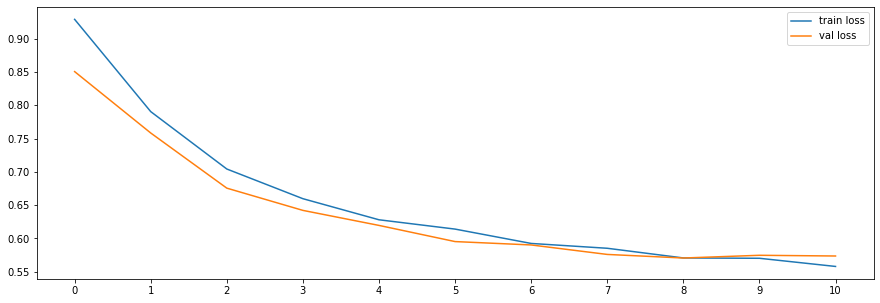

In [82]:
figure = plt.figure(figsize=(15, 5))
plt.plot(epochs, history.history['loss'], label="train loss")
plt.plot(epochs, history.history['val_loss'], label="val loss")
plt.xticks(epochs, epochs)
plt.legend()

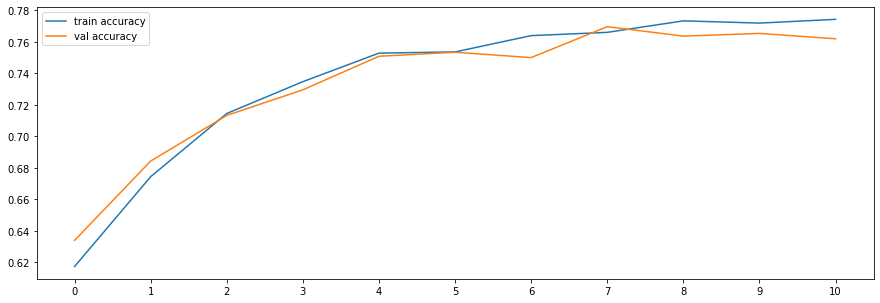

In [83]:
figure = plt.figure(figsize=(15, 5))
plt.plot(epochs, history.history['accuracy'], label="train accuracy")
plt.plot(epochs, history.history['val_accuracy'], label="val accuracy")
plt.xticks(epochs, epochs)
plt.legend()

In [84]:
cn_mat = pd.DataFrame(confusion_matrix(ytest, pred), columns=["negative_true", "neutral_true", "positive_true"],
                                                     index=["negative_pred", "neutral_pred", "positive_pred"])

In [85]:
cn_mat

negative_true  neutral_true  positive_true
negative_pred           1665            91             62
neutral_pred             295           274             92
positive_pred             94            56            299

In [86]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1818
           1       0.65      0.41      0.51       661
           2       0.66      0.67      0.66       449

    accuracy                           0.76      2928
   macro avg       0.71      0.67      0.68      2928
weighted avg       0.75      0.76      0.75      2928

